## ДЗ №1

Всего объектов 395, а признаков - 33. Все признаки имеют разную природу.
Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

Используя данные таблицы 'math_students.csv', ответьте на следующие вопросы:

In [331]:
import pandas as pd
from io import BytesIO
import httpx

csv = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
io = BytesIO(httpx.get(csv).read())
io.seek(0)
df = pd.read_table(io, sep=',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [332]:
print(df['reason'].value_counts()[:1])

course    145
Name: reason, dtype: int64


2. Найдите количество студентов, у родителей которых нет никакого образования.

In [333]:
print(len(df[(df['Fedu'] == 0) & (df['Medu'] == 0)]))

0


3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [334]:
print(df[df['school'] == 'MS']['age'].min())

17


4. Найдите количество студентов, имеющих нечетное число пропусков.

In [335]:
print(len(df[df['absences'] % 2 == 1]))

41


5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [343]:
averages = df.groupby('romantic')['G3'].mean()
print(round(averages[1] - averages[0],2))

-1.26


6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*

In [363]:
print(df.groupby(['activities', 'absences'], as_index=False)['absences'].sum().max())

activities    yes
absences      128
dtype: object


## ДЗ №2. Анализ данных пассажиров "Титаника"

https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

Значение столбцов таблицы:

* PassengerId — идентификатор пассажира
* Survival — поле в котором указано спасся человек (1) или нет (0)
* Pclass — содержит социально-экономический статус:
    - высокий
    - средний
    - низкий
* Name — имя пассажира
* Sex — пол пассажира
* Age — возраст
* SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
* Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
* Ticket — номер билета
* Fare — цена билета
* Cabin — каюта
* Embarked — порт посадки
    - C — Cherbourg
    - Q — Queenstown
    - S — Southampton

Ответьте на следующие вопросы:

In [321]:
from io import BytesIO
import httpx

csv = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
io = BytesIO(httpx.get(csv).read())

In [322]:
import pandas as pd

io.seek(0)
df = pd.read_table(io, sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Сколько мужчин / женщин находилось на борту?

In [323]:
print("Total males:", len(df[df['Sex'] == 'male']))

Total males: 577


2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужщин 2-го класса?

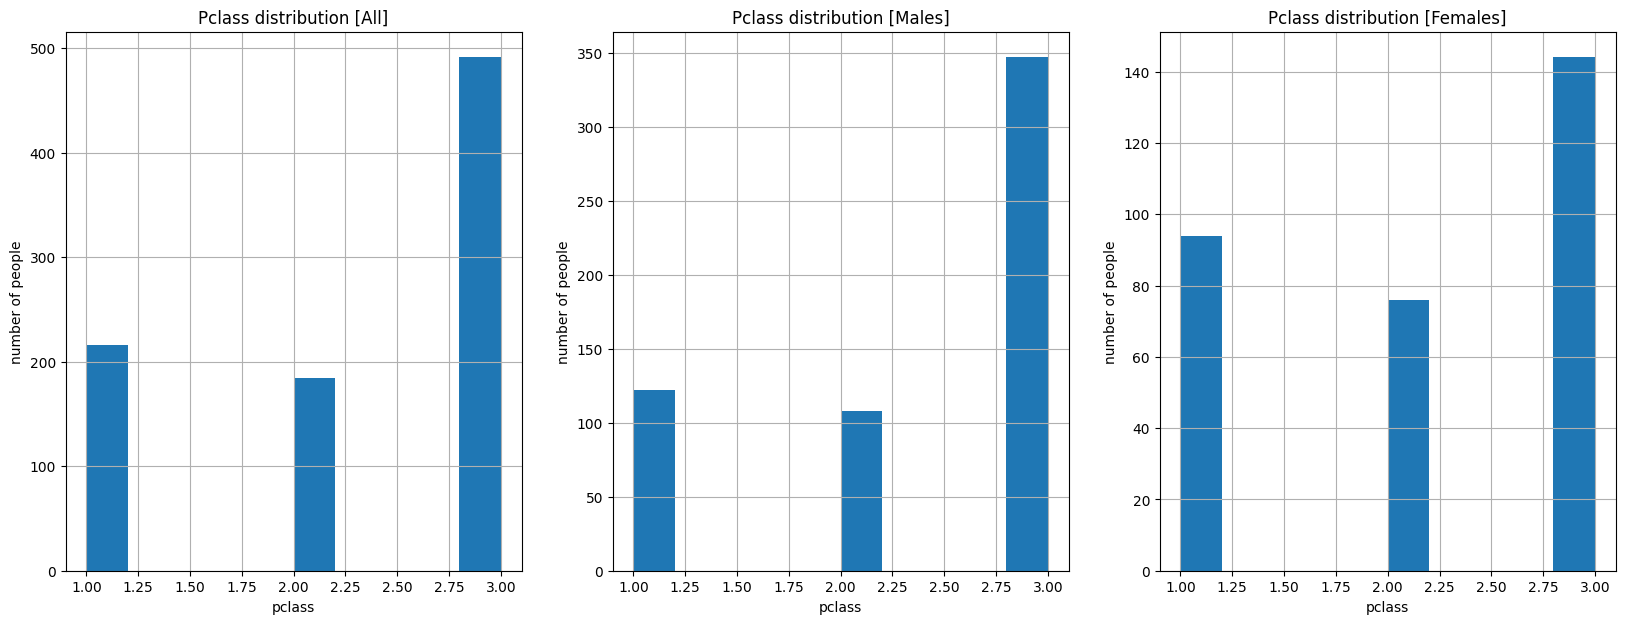

Total Pclass=2 males: 108


In [324]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.title('Pclass distribution [All]')
df['Pclass'].hist()
plt.xlabel('pclass')
plt.ylabel('number of people')
plt.subplot(1, 3, 2)
plt.title('Pclass distribution [Males]')
df[df['Sex'] == 'male']['Pclass'].hist()
plt.xlabel('pclass')
plt.ylabel('number of people')
plt.subplot(1, 3, 3)
plt.title('Pclass distribution [Females]')
df[df['Sex'] == 'female']['Pclass'].hist()
plt.xlabel('pclass')
plt.ylabel('number of people')
plt.show()

print("Total Pclass=2 males:", len(df[(df['Sex'] == 'male') & (df['Pclass'] == 2)]))

Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [325]:
print("Медиана:", df['Fare'].median())
print("Стандартное отклонение:", df['Fare'].std())

Медиана: 14.4542
Стандартное отклонение: 49.6934285971809


4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [326]:
under30 = len(df[df['Age'] < 30])
older60 = len(df[df['Age'] > 60])
under30_survived = len(df[(df['Age'] < 30) & (df['Survived'] == 1)])
older60_survived = len(df[(df['Age'] > 60) & (df['Survived'] == 1)])
print(under30_survived / under30 > older60_survived / older60)
print(
    f"Survived younger than 30 years old: {under30_survived}/{under30} ({round(100 * under30_survived / under30, 2)}%)")
print(f"Survived older than 60 years old: {older60_survived}/{older60} ({round(100 * older60_survived / older60, 2)}%)")

True
Survived younger than 30 years old: 156/384 (40.62%)
Survived older than 60 years old: 5/22 (22.73%)


5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [327]:
males = len(df[df['Sex'] == 'male'])
females = len(df[df['Sex'] == 'female'])
males_survived = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
females_survived = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
print(females_survived / females > males_survived / males)
print(f"Males survived: {males_survived}/{males} ({100 * round(males_survived / males, 2)}%)")
print(f"Females survived: {females_survived}/{females} ({100 * round(females_survived / females, 2)}%)")

True
Males survived: 109/577 (19.0%)
Females survived: 233/314 (74.0%)


6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [328]:
from collections import Counter

names = []
for full_name in df['Name']:
    credentials = full_name.split()
    for i, cred in enumerate(credentials):
        if cred.endswith("."):
            names.append(credentials[i + 1])

print(
    pd.DataFrame(
        sorted(Counter(names).items(), key=lambda s: -s[1]),
        columns=['Name', 'Count']
    ).head()
)

      Name  Count
0  William     48
1     John     31
2   Thomas     19
3  Charles     16
4   George     16


7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

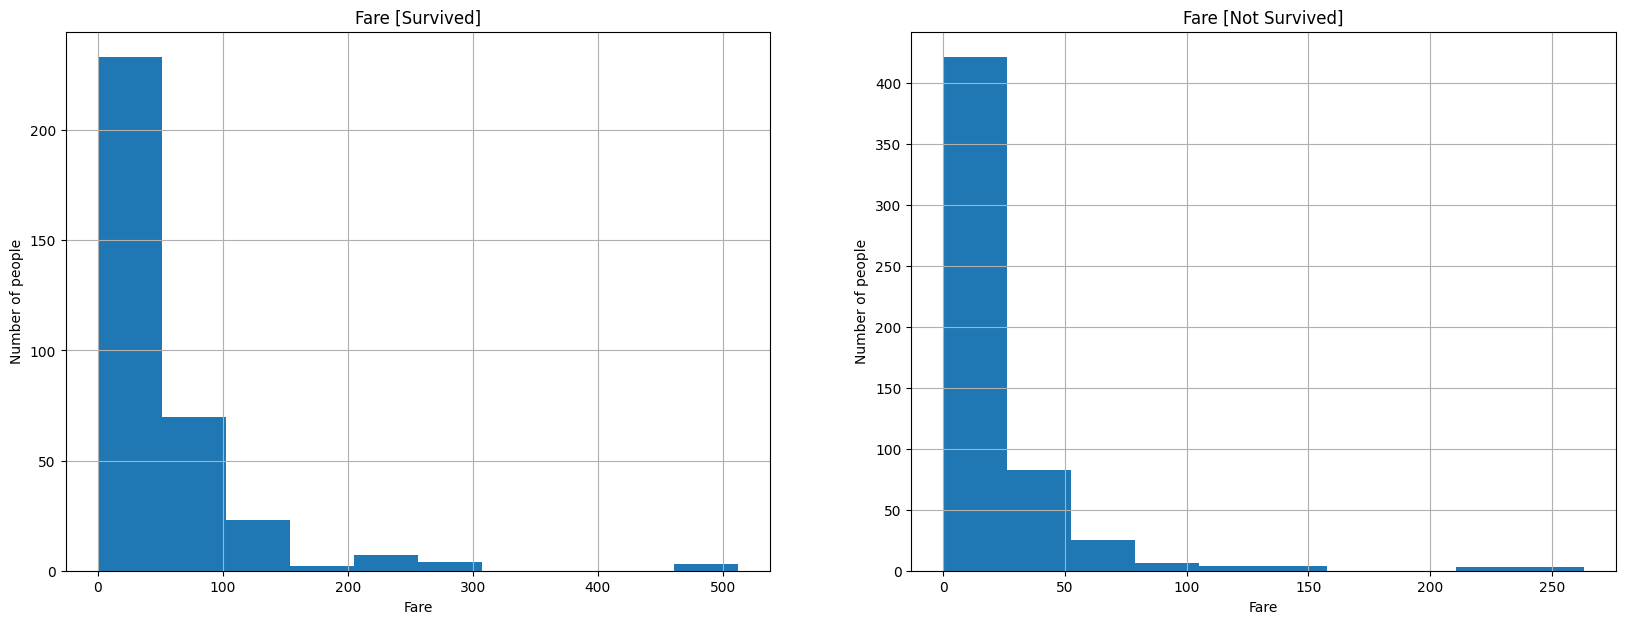

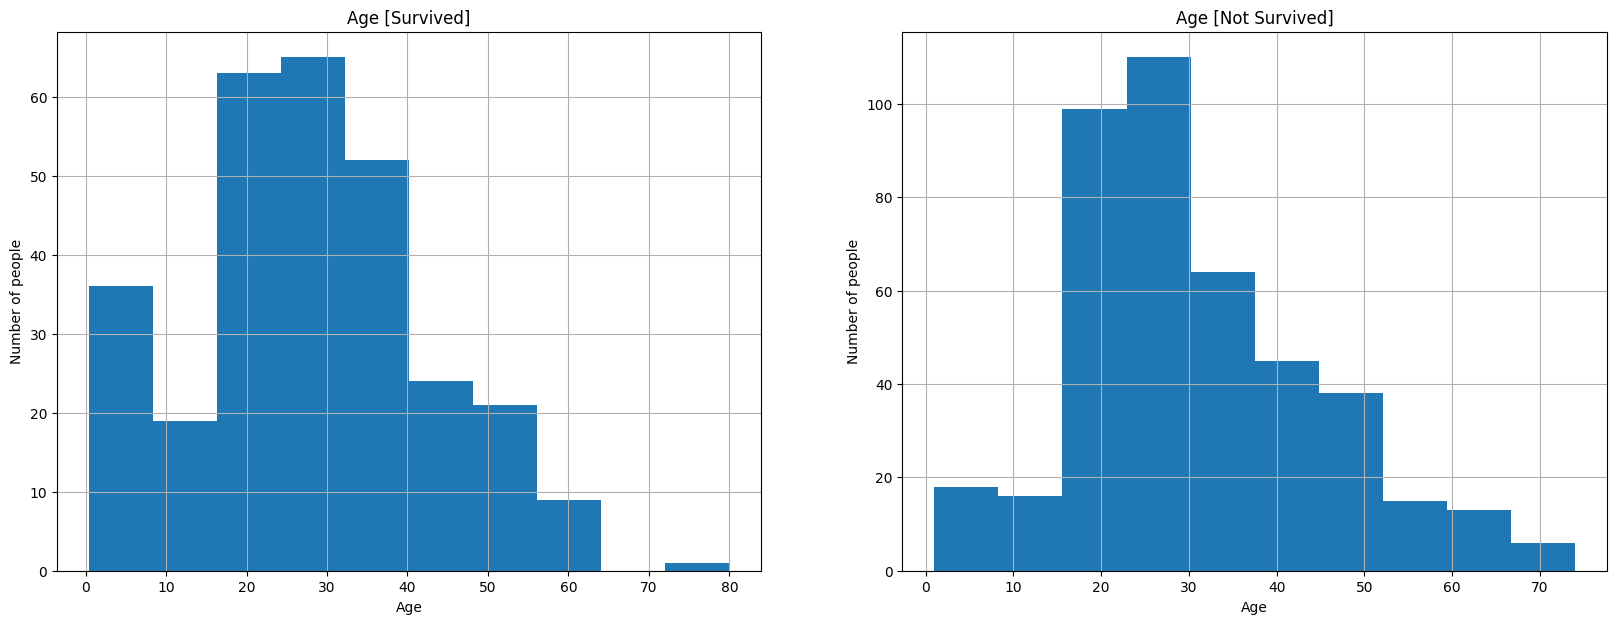

Average died age is higher than survivals


In [329]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Fare [Survived]')
df[df['Survived'] == 1]['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('Number of people')
plt.subplot(1, 2, 2)
plt.title('Fare [Not Survived]')
df[df['Survived'] == 0]['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('Number of people')
plt.show()

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Age [Survived]')
df[df['Survived'] == 1]['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.subplot(1, 2, 2)
plt.title('Age [Not Survived]')
df[df['Survived'] == 0]['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

age_hypothesis = df[df['Survived'] == 1]['Age'].mean() < df[df['Survived'] == 0]['Age'].mean()
print(f"Average died age is {'not ' if not age_hypothesis else ''}higher than survivals")

8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

    - В среднем мужчины 1-го класса старше 40 лет
    - В среднем женщины 1-го класса старше 40 лет
    - Мужчины всех классов в среднем старше женщин того же класса
    - В среднем люди в 1-ом классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [330]:
hypothesis1 = df[(df['Pclass'] == 1) & (df['Sex'] == 'male')]['Age'].median() > 40

hypothesis2 = df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]['Age'].median() > 40

elements = list(df.groupby(['Pclass', 'Sex'])['Age'].median())
hypothesis3 = all(elements[i] < elements[i + 1] for i in range(0, len(elements), 2))

hypothesis4 = df.groupby(['Pclass'])['Age'].median().is_monotonic_decreasing

print(f"1st class males are {'not ' if not hypothesis1 else ''}older than 40")
print(f"1st class females are {'not ' if not hypothesis2 else ''}older than 40")
print(f"Males from all classes are {'not ' if not hypothesis3 else ''}older than women from same classes")
print(
    f"Hypothesis that 1st class humans are older, than 2nd class humans, who are older than 3rd class humans is {'not ' if not hypothesis4 else ''}true")

1st class males are not older than 40
1st class females are not older than 40
Males from all classes are older than women from same classes
Hypothesis that 1st class humans are older, than 2nd class humans, who are older than 3rd class humans is true
